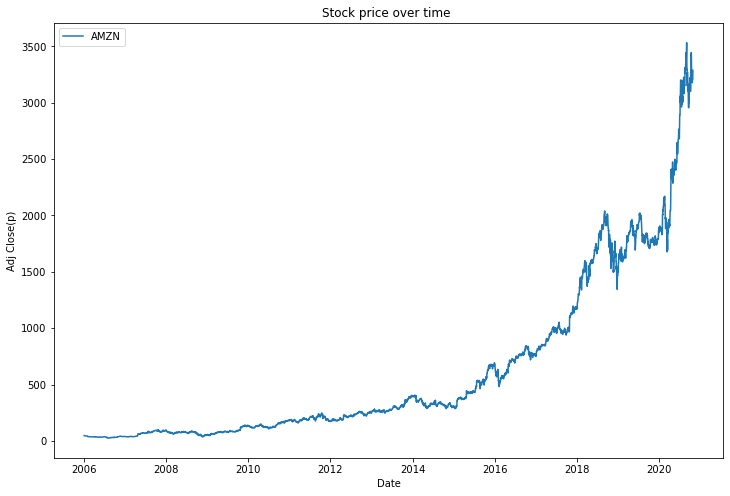

In [10]:




from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from datetime import datetime


START_DATE = '2006-01-01'
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))


USA_STOCK = 'AMZN'

def get_stats(stock_data):
    return{
        'last': np.mean(stock_data.tail(1)),
        'short_mean': np.mean(stock_data.tail(20)),
        'long_mean' : np.mean(stock_data.tail(200)),
        'short_rolling': stock_data.rolling(window=20).mean(),
        'long_rolling': stock_data.rolling(window=200).mean()
    }

def clean_data(stock_data, col):
    weekdays = pd.date_range(start =START_DATE, end = END_DATE)
    clean_data = stock_data[col].reindex(weekdays)
    return clean_data.fillna(method='ffill')


def create_plot(stock_data, ticker):
    stats = get_stats(stock_data)
    plt.subplots(figsize=(12,8))
    plt.plot(stock_data, label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Adj Close(p)')
    plt.legend()
    plt.title('Stock price over time ')
    plt.show()
    
    

def get_data(ticker):
    try:
        stock_data = data.DataReader(ticker,
                                    'yahoo',
                                    START_DATE,
                                    END_DATE)
        
        
        adj_close = clean_data(stock_data, 'Adj Close')
        create_plot(adj_close, ticker)
    except RemoteDataError:
        print(f'No data found for {ticker}')
        
get_data(USA_STOCK)








    
    
    




In [ ]:
# your code here

In [ ]:
# your code here